# **Multiple Batch Linear Regression with Normalization**

In [7]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt

In [8]:
x_train, y_train = load_data()

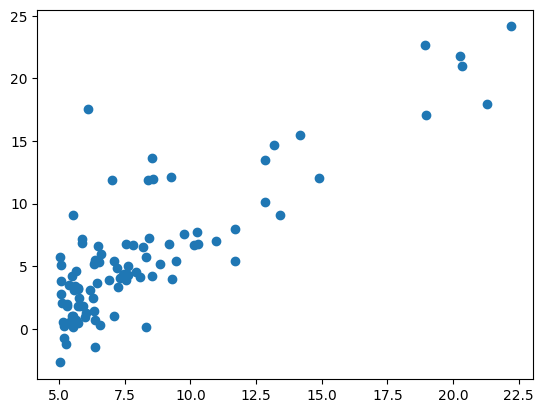

In [9]:
plt.scatter(x_train, y_train)
plt.show()

In [10]:
x_train = x_train.reshape(x_train.shape + (1,))

In [11]:
def normalize(v):
    norm = np.linalg.norm(v, axis=0)
    while norm.any == 0:
       norm[np.argmin(norm)] = 1
    return norm, v / norm
class BatchLinearRegressor:
    def __init__(self, normalize = False) -> None:
        self.a = 0
        self.b = 0
        self.fitted = False
        self.normalize = normalize
        if normalize:
            self.x_norm = 0
            self.y_norm = 0

    def fit(self, X, y, learning_rate = 1e-03, max_iter = 100, min_error = 1e-03):
        self.a = np.ones(X.shape[1])
        self.fitted = True
        costs = []
        if self.normalize:
            self.x_norm, X = normalize(X)
            self.y_norm, y = normalize(y)

        prev_cost = 0
        for i in range(1, max_iter + 1):
            print(f"Epoch {i}: ", end='')

            # Predicting
            y_hat = self.predict(X, True)

            difference = (y_hat - y).reshape(-1, 1)

            # Calcualting Cost
            m = len(y)
            cost = (1/m)*np.sum(np.power(difference, 2))
            
            # Finding differentials
            db = (2/m)*np.sum(difference)
            da = (2/m)*(difference.T@X)[:][0]

            # Updating parameters
            self.b -= learning_rate*db
            self.a -= learning_rate*da

            print("Cost=", cost)
            if(abs((prev_cost - cost)/cost) <= min_error):
                print("Model Converged")
                break
            prev_cost = cost
            costs.append(cost)
        plt.plot(costs)

    def predict(self, X:np.ndarray, training = False):
        if not self.fitted:
            print("Please fit data before predicting!")
            return
        
        if(type(X) == int or type(X) == float):
            X = np.array(X).reshape(1,1)
        X = np.array(X)
        if not training and self.normalize:
            X = X/self.x_norm

        if not training and self.normalize:
            return ((self.a @ X.T) + self.b) * self.y_norm
        else:
            return (self.a @ X.T) + self.b


Epoch 1: Cost= 0.001978056396589513
Epoch 2: Cost= 0.0018637081265448195
Epoch 3: Cost= 0.0017907736229700582
Epoch 4: Cost= 0.0017442321375626606
Epoch 5: Cost= 0.0017145109547117394
Epoch 6: Cost= 0.00169550938738739
Epoch 7: Cost= 0.0016833394706833535
Epoch 8: Cost= 0.0016755234064250956
Epoch 9: Cost= 0.0016704820950094153
Epoch 10: Cost= 0.001667209176994941
Epoch 11: Cost= 0.0016650632999665068
Epoch 12: Cost= 0.001663635730308998
Model Converged


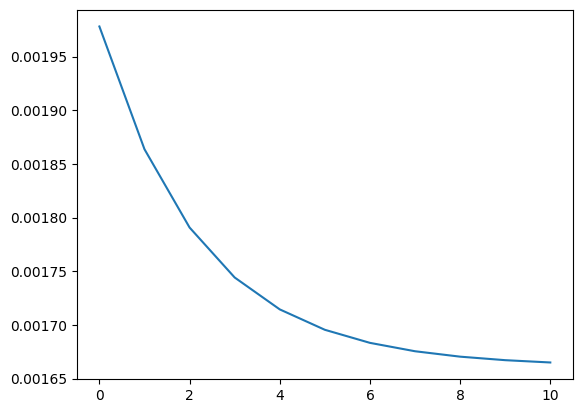

In [12]:
model = BatchLinearRegressor(True)
model.fit(x_train, y_train, 0.1, 100)

In [13]:
model.predict(20.5)

array([16.89212918])

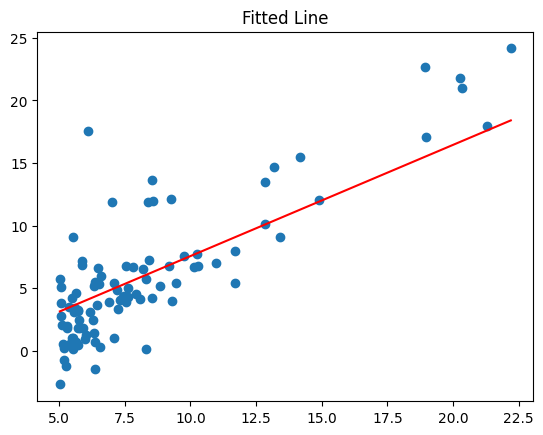

In [14]:
plt.scatter((x_train), (y_train))
x = np.linspace(min(x_train), max(x_train))
plt.plot(x, model.predict(x), color = "red")
plt.title("Fitted Line")
plt.show()

In [15]:
model.predict(5)

array([3.13254789])

## Multiple Linear Regresssion Test

In [16]:
x_train, y_train = load_data_multi()

Epoch 1: Cost= 0.022211279699506117
Epoch 2: Cost= 0.0148102673997737
Epoch 3: Cost= 0.010164197479191867
Epoch 4: Cost= 0.007247355374127211
Epoch 5: Cost= 0.005415918748398011
Epoch 6: Cost= 0.004265772056024264
Epoch 7: Cost= 0.0035432593339622285
Epoch 8: Cost= 0.0030891653568643996
Epoch 9: Cost= 0.0028035536290103016
Epoch 10: Cost= 0.0026236958327597397
Epoch 11: Cost= 0.0025102185456396054
Epoch 12: Cost= 0.0024384077871711035
Epoch 13: Cost= 0.002392751041410231
Epoch 14: Cost= 0.002363511383982173
Epoch 15: Cost= 0.002344577124066158
Epoch 16: Cost= 0.002332112063865164
Epoch 17: Cost= 0.002323708291077563
Epoch 18: Cost= 0.002317854402174105
Epoch 19: Cost= 0.0023136017158418842
Epoch 20: Cost= 0.0023103547612472438
Epoch 21: Cost= 0.0023077397713372797
Epoch 22: Cost= 0.002305522138482249
Model Converged


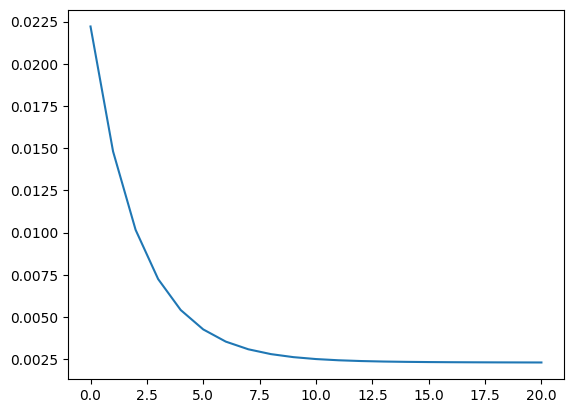

In [17]:
model_2 = BatchLinearRegressor(True)
model_2.fit(x_train, y_train, 0.1, 100, 1e-3)


Epoch 1: Cost= 129657071418.21277
Epoch 2: Cost= 107644876310.2099
Epoch 3: Cost= 89513278417.39464
Epoch 4: Cost= 74578155384.74255
Epoch 5: Cost= 62275990880.140396
Epoch 6: Cost= 52142612589.63565
Epoch 7: Cost= 43795678556.550545
Epoch 8: Cost= 36920251057.453606
Epoch 9: Cost= 31256913703.669907
Epoch 10: Cost= 26591983415.319794
Epoch 11: Cost= 22749447956.398895
Epoch 12: Cost= 19584324826.464478
Epoch 13: Cost= 16977190933.623564
Epoch 14: Cost= 14829676648.205584
Epoch 15: Cost= 13060754223.498003
Epoch 16: Cost= 11603680542.145409
Epoch 17: Cost= 10403478835.139042
Epoch 18: Cost= 9414864356.269793
Epoch 19: Cost= 8600535745.777945
Epoch 20: Cost= 7929767614.732345
Epoch 21: Cost= 7377251247.01505
Epoch 22: Cost= 6922139677.499835
Epoch 23: Cost= 6547261116.319951
Epoch 24: Cost= 6238471040.9781275
Epoch 25: Cost= 5984118510.120651
Epoch 26: Cost= 5774606562.488928
Epoch 27: Cost= 5602030114.48473
Epoch 28: Cost= 5459877693.8814945
Epoch 29: Cost= 5342785755.812105
Epoch 30: 

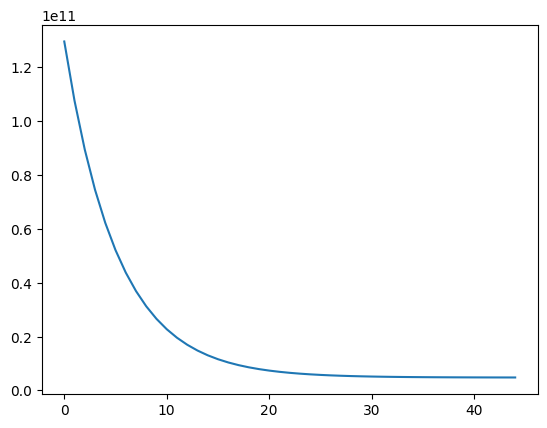

In [18]:
model_3 = BatchLinearRegressor()
model_3.fit(x_train, y_train, 1e-8, 15000, 1e-3)

In [19]:
for i in range(10):
    print("Model 2:", model_2.predict(x_train[i]), y_train[i], f"Loss: {model_2.predict(x_train[i]) - y_train[i]}")
    print("Model 3:", model_3.predict(x_train[i]), y_train[i], f"Loss: {model_3.predict(x_train[i]) - y_train[i]}")

Model 2: 340085.3210959454 399900.0 Loss: -59814.67890405463
Model 3: 343969.8327322878 399900.0 Loss: -55930.16726771218
Model 2: 257266.68163737372 329900.0 Loss: -72633.31836262628
Model 3: 261574.93448950283 329900.0 Loss: -68325.06551049717
Model 2: 388724.8395081223 369000.0 Loss: 19724.8395081223
Model 3: 392360.48725582816 369000.0 Loss: 23360.487255828164
Model 2: 118642.06130349901 232000.0 Loss: -113357.93869650099
Model 3: 231493.00740773033 232000.0 Loss: -506.99259226967115
Model 2: 595707.701934786 539900.0 Loss: 55807.70193478605
Model 3: 490450.9017760899 539900.0 Loss: -49449.098223910085
Model 2: 428920.16413627384 299900.0 Loss: 129020.16413627384
Model 3: 324516.7317038146 299900.0 Loss: 24616.731703814585
Model 2: 246421.38361303703 314900.0 Loss: -68478.61638696297
Model 3: 250785.12638628102 314900.0 Loss: -64114.873613718984
Model 2: 228838.85499782432 198999.0 Loss: 29839.854997824325
Model 3: 233292.55870378498 198999.0 Loss: 34293.55870378498
Model 2: 221115